In [41]:
import pandas as pd
import matplotlib.pyplot as plt 


In [42]:
df = pd.read_csv('selected_features_without_text.csv')

In [43]:
df = df.drop(columns=["Unnamed: 0","reviewID", "restaurantID"])

In [44]:
df.columns

Index(['reviewerID', 'flagged', 'reviewerFriendCount', 'reviewerNumReviews',
       'reviewerUsefulCount', 'resReviewCount', 'resRating',
       'date_diff_joinedandreviewed', 'Num_Punc', 'adj_count', 'polarity',
       'subjectivity', 'main_topic', 'reviewRating_1', 'reviewRating_2',
       'reviewRating_3', 'reviewRating_4', 'reviewRating_5'],
      dtype='object')

In [45]:
X = df.drop(['flagged'], axis=1) 
y = df.flagged

In [46]:
from sklearn.model_selection import GroupShuffleSplit

splitter = GroupShuffleSplit(test_size=0.2, n_splits=1, random_state=42)
split = splitter.split(X, groups=X['reviewerID'])
train_inds, test_inds = next(split)

X_train = X.iloc[train_inds]
X_test = X.iloc[test_inds]
y_train = y.iloc[train_inds]
y_test = y.iloc[test_inds]

In [47]:
X_train = X_train.drop(['reviewerID'], axis = 1)

In [48]:
X_test = X_test.drop(['reviewerID'], axis = 1)

In [49]:
X_train

,reviewerFriendCount,reviewerNumReviews,reviewerUsefulCount,resReviewCount,resRating,date_diff_joinedandreviewed,Num_Punc,adj_count,polarity,subjectivity,main_topic,reviewRating_1,reviewRating_2,reviewRating_3,reviewRating_4,reviewRating_5
1,0.000000,0.001149,0.000000,841,4.5,0.183244,0.031250,0.068376,0.466667,0.566667,0.263158,False,False,False,False,True
2,0.000425,0.003831,0.000276,841,4.5,0.565800,0.028125,0.042735,0.413333,0.720000,0.473684,False,False,True,False,False
3,0.017850,0.022605,0.001609,841,4.5,0.689365,0.262500,0.290598,0.120548,0.535201,0.868421,False,False,True,False,False
4,0.070761,0.462835,0.075869,841,4.5,0.725708,0.090625,0.170940,0.167460,0.564683,0.868421,False,False,False,False,True
5,0.012537,0.020307,0.003127,841,4.5,0.430375,0.234375,0.324786,0.177801,0.458819,0.868421,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26947,0.006162,0.009962,0.001885,18,4.5,0.222265,0.137500,0.085470,0.236429,0.519524,0.763158,False,False,False,False,True
26949,0.002125,0.003065,0.000368,14,4.0,0.170620,0.015625,0.034188,0.460000,0.490000,0.342105,False,False,False,False,True
26951,0.006587,0.062835,0.009242,14,4.0,0.553175,0.050000,0.051282,0.226623,0.760173,0.763158,False,False,False,True,False
26952,0.001275,0.003831,0.000322,15,4.0,0.598317,0.053125,0.076923,0.269271,0.608333,0.894737,False,False,False,False,True


In [50]:
X_test

,reviewerFriendCount,reviewerNumReviews,reviewerUsefulCount,resReviewCount,resRating,date_diff_joinedandreviewed,Num_Punc,adj_count,polarity,subjectivity,main_topic,reviewRating_1,reviewRating_2,reviewRating_3,reviewRating_4,reviewRating_5
0,0.002337,0.018008,0.001885,841,4.5,0.415838,0.446875,0.427350,1.391395e-01,0.528655,0.868421,False,False,False,False,True
8,0.007012,0.079693,0.011403,841,4.5,0.660291,0.368750,0.282051,1.818329e-01,0.542510,0.868421,False,False,False,False,True
12,0.005100,0.000766,0.000414,841,4.5,0.529457,0.418750,0.521368,1.206101e-01,0.484375,0.868421,False,False,False,False,True
25,0.002762,0.031418,0.001747,841,4.5,0.138485,0.150000,0.128205,2.605442e-01,0.500340,0.105263,False,False,False,False,True
34,0.014450,0.050192,0.007081,841,4.5,0.217674,0.184375,0.299145,2.763492e-01,0.638016,0.894737,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26944,0.001912,0.014943,0.001885,19,4.5,0.097552,0.056250,0.094017,1.901042e-01,0.682986,0.736842,False,False,False,True,False
26948,0.002762,0.018008,0.001977,14,4.0,0.232976,0.012500,0.008547,8.000000e-01,0.750000,0.342105,False,False,True,False,False
26950,0.011475,0.011111,0.001150,13,4.5,0.247896,0.106250,0.213675,2.019913e-01,0.659586,0.105263,False,False,False,False,True
26953,0.002762,0.018391,0.002667,16,4.0,0.008416,0.025000,0.042735,-1.190476e-01,0.588095,0.263158,False,False,True,False,False


### Get Model Results Function 

In [51]:
import seaborn as sns
from sklearn import metrics
def evaluate(clf, X_train, X_test, y_train, y_test): 
    for i in range(2):
        if i == 0:
            print("\n===== Performance on Training Set =====\n")
        else:
            print("\n===== Performance on Testing Set =====\n")
        if i == 0:
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_train)
            # Confusion matrix
            cmn = metrics.confusion_matrix(y_train, y_pred, normalize = 'true') 
            sns.heatmap(cmn,annot=True,fmt=".2f", cmap="coolwarm", xticklabels=["Fraud", "Not Fraud"], yticklabels=["Fraud", "Not Fraud"])
            plt.title("Confusion Matrix")
            plt.ylabel("Actual")
            plt.xlabel("Predicted")
            plt.show()
            print('Accuracy = {:.5f}'.format(metrics.accuracy_score(y_train, y_pred)))
            print(metrics.classification_report(y_train, y_pred)) 
        else:
            model_name = type(clf).__name__
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            # Confusion matrix
            cmn = metrics.confusion_matrix(y_test, y_pred, normalize = 'true')
            sns.heatmap(cmn,annot=True,fmt=".2f", cmap="coolwarm", xticklabels=["Fraud", "Not Fraud"], yticklabels=["Fraud", "Not Fraud"])
            plt.title("Confusion Matrix")
            plt.ylabel("Actual")
            plt.xlabel("Predicted")
            plt.show()
            print('Accuracy = {:.5f}'.format(metrics.accuracy_score(y_test, y_pred))) 
            print(metrics.classification_report(y_test, y_pred))
            y_pred_proba_model = clf.predict_proba(X_test)[::,1]
            fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_model)
            auc = metrics.roc_auc_score(y_test, y_pred_proba_model)
            
            plt.figure(figsize=(8,5))
            plt.plot(fpr,tpr,label = model_name + " auc:"+str(round(auc,2)))
            plt.legend(loc=4, title='Models', facecolor='white')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('ROC', size=15)
            plt.show()

## XGBoost

In [52]:
X_train.columns

Index(['reviewerFriendCount', 'reviewerNumReviews', 'reviewerUsefulCount',
       'resReviewCount', 'resRating', 'date_diff_joinedandreviewed',
       'Num_Punc', 'adj_count', 'polarity', 'subjectivity', 'main_topic',
       'reviewRating_1', 'reviewRating_2', 'reviewRating_3', 'reviewRating_4',
       'reviewRating_5'],
      dtype='object')


===== Performance on Training Set =====



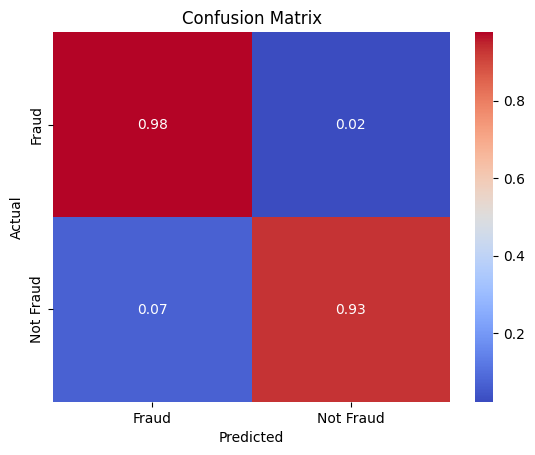

Accuracy = 0.96577
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     16467
           1       0.92      0.93      0.93      5007

    accuracy                           0.97     21474
   macro avg       0.95      0.95      0.95     21474
weighted avg       0.97      0.97      0.97     21474


===== Performance on Testing Set =====



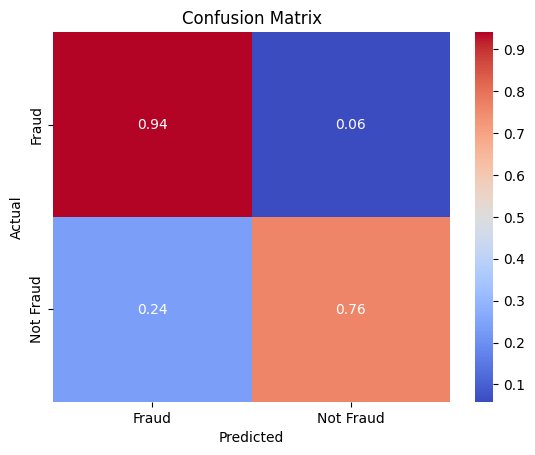

Accuracy = 0.90259
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      4285
           1       0.78      0.76      0.77      1197

    accuracy                           0.90      5482
   macro avg       0.86      0.85      0.86      5482
weighted avg       0.90      0.90      0.90      5482



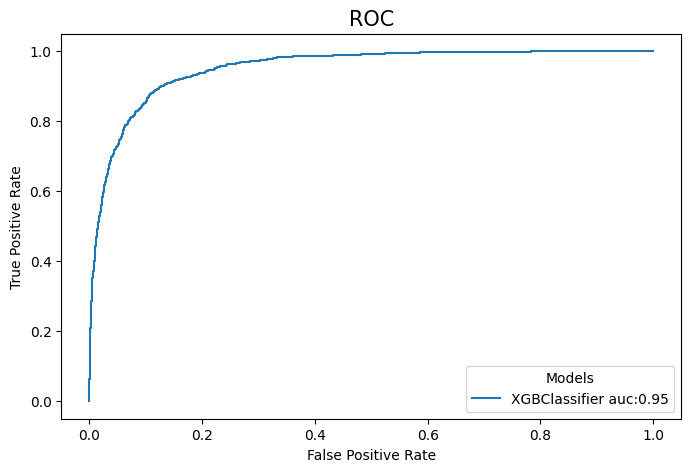

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgb_model = XGBClassifier()
evaluate(xgb_model, X_train, X_test, y_train, y_test)

In [54]:
xgb_model = XGBClassifier()
#Define hyperparameters to tune
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [3, 5, 10, 15],
    'n_estimators': [50, 100, 150],
    'subsample': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 2, 3]
}

# Perform grid search to find best hyperparameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring = 'f1')
# grid_search.fit(X_train, y_train)


In [55]:
grid_search.best_params_ =  {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 50, 'subsample': 0.6}

In [56]:
print("Best hyperparameters: ", grid_search.best_params_)


Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 50, 'subsample': 0.6}


In [57]:
# #xgb model before dropping variables
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV


# grid_search.fit(X_train, y_train)

# # Print best hyperparameters
# print("Best hyperparameters: ", grid_search.best_params_)

# # Retrain model with best hyperparameters
# xgb_best = XGBClassifier(**grid_search.best_params_)
# xgb_best.fit(X_train, y_train)

# # Evaluate best model
# y_pred_xgb = xgb_best.predict(X_test)

# xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
# xgb_f1 = f1_score(y_test, y_pred_xgb)
# xgb_precision = precision_score(y_test, y_pred_xgb)
# xgb_recall = recall_score(y_test, y_pred_xgb)

# print('Accuracy with best hyperparameters: %.2f%%' % (xgb_accuracy * 100.0))
# print('F1 Score with best hyperparameters: %.2f%%' % (xgb_f1 * 100.0))
# print('Precision with best hyperparameters: %.2f%%' % (xgb_precision * 100.0))
# print('Recall with best hyperparameters: %.2f%%' % (xgb_recall * 100.0))



===== Performance on Training Set =====



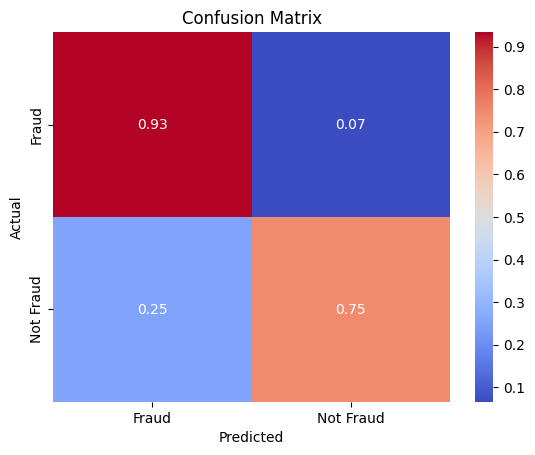

Accuracy = 0.89001
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     16467
           1       0.77      0.75      0.76      5007

    accuracy                           0.89     21474
   macro avg       0.85      0.84      0.84     21474
weighted avg       0.89      0.89      0.89     21474


===== Performance on Testing Set =====



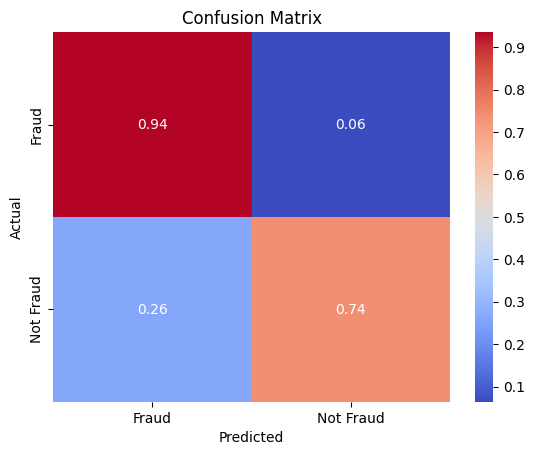

Accuracy = 0.89256
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      4285
           1       0.76      0.74      0.75      1197

    accuracy                           0.89      5482
   macro avg       0.84      0.84      0.84      5482
weighted avg       0.89      0.89      0.89      5482



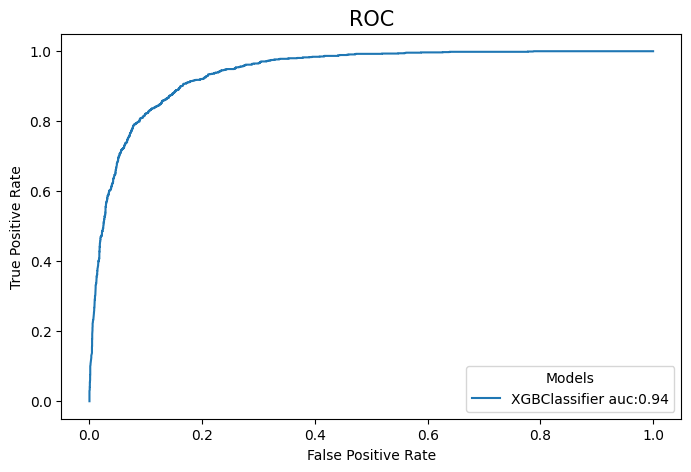

In [58]:
xgboost_best_params = XGBClassifier(**grid_search.best_params_)
xgboost_best_params.fit(X_train, y_train)
evaluate(xgboost_best_params, X_train, X_test, y_train, y_test)

Support vector machine

Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      4285
           1       0.68      0.74      0.71      1197

    accuracy                           0.87      5482
   macro avg       0.80      0.82      0.81      5482
weighted avg       0.87      0.87      0.87      5482



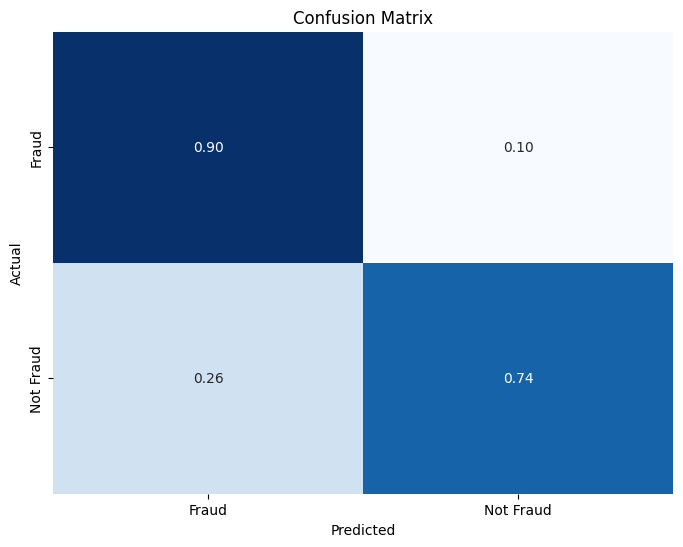

In [59]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create an SVM model
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear', C=1))

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display additional evaluation metrics
print(classification_report(y_test, y_pred))

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Convert to decimals over 1
conf_matrix_decimal = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_decimal, annot=True, fmt=".2f", cmap="Blues", cbar=False,
            xticklabels=['Fraud', 'Not Fraud'],
            yticklabels=['Fraud', 'Not Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Best Hyperparameters: {'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      4285
           1       0.68      0.76      0.72      1197

    accuracy                           0.87      5482
   macro avg       0.80      0.83      0.82      5482
weighted avg       0.87      0.87      0.87      5482



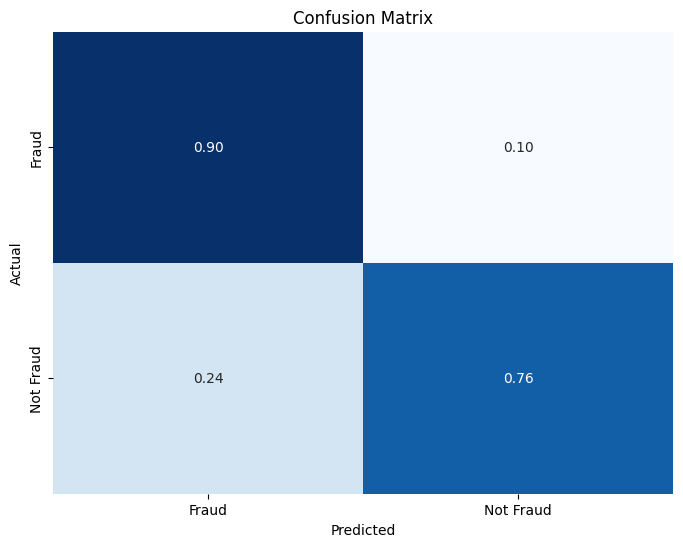

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM model pipeline
svm_model = make_pipeline(StandardScaler(), SVC())

# Define the hyperparameter grid to search
param_grid = {
    'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # More kernel options
    'svc__C': [0.1, 1, 10],  # Regularization parameter
    'svc__gamma': ['scale', 'auto'],  # Kernel coefficient (gamma) for rbf, poly, and sigmoid
    # Add other hyperparameters as needed for the specific kernel
}

# Perform GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display additional evaluation metrics
print(classification_report(y_test, y_pred))

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Convert to decimals over 1
conf_matrix_decimal = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_decimal, annot=True, fmt=".2f", cmap="Blues", cbar=False,
            xticklabels=['Fraud', 'Not Fraud'],
            yticklabels=['Fraud', 'Not Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      4285
           1       0.63      0.11      0.19      1197

    accuracy                           0.79      5482
   macro avg       0.72      0.55      0.53      5482
weighted avg       0.76      0.79      0.73      5482



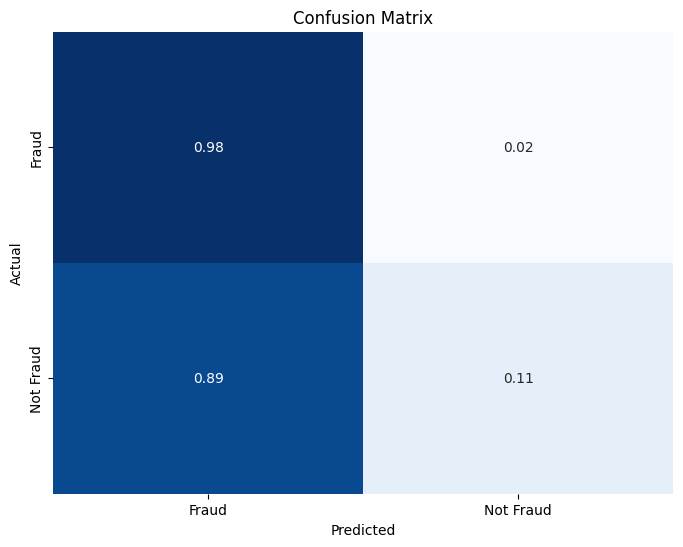

In [66]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

min_value = df['polarity'].min()

# Shift all values by the absolute value of the minimum value
df['polarity_positive'] = df['polarity'] + abs(min_value)

X_train_copy['polarity'] = X_train_copy['polarity'] + abs(min_value)
X_test_copy['polarity'] = X_test_copy['polarity'] + abs(min_value)


nb_classifier = MultinomialNB()

# Train the model
nb_classifier.fit(X_train_copy, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_copy)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display additional evaluation metrics
print(classification_report(y_test, y_pred))

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Convert to decimals over 1
conf_matrix_decimal = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_decimal, annot=True, fmt=".2f", cmap="Blues", cbar=False,
            xticklabels=['Fraud', 'Not Fraud'],
            yticklabels=['Fraud', 'Not Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Best Hyperparameters: {'alpha': 0.01, 'class_prior': None, 'fit_prior': True}
Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      4285
           1       0.63      0.11      0.19      1197

    accuracy                           0.79      5482
   macro avg       0.71      0.55      0.53      5482
weighted avg       0.76      0.79      0.73      5482



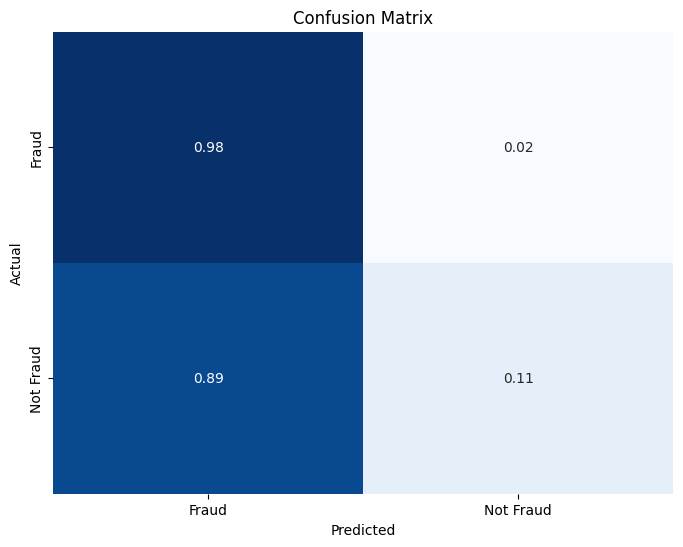

In [75]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],  # Smoothing parameter
    'fit_prior': [True, False],  # Whether to learn class prior probabilities
    'class_prior': [None, [0.2, 0.8], [0.5, 0.5], [0.8, 0.2], [0.3, 0.7]]  # Prior probabilities for classes
    # Add more hyperparameters as needed
}

# Create a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Perform GridSearchCV
grid_search = GridSearchCV(nb_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_copy, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_copy)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display additional evaluation metrics
print(classification_report(y_test, y_pred))

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Convert to decimals over 1
conf_matrix_decimal = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_decimal, annot=True, fmt=".2f", cmap="Blues", cbar=False,
            xticklabels=['Fraud', 'Not Fraud'],
            yticklabels=['Fraud', 'Not Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()